In [130]:
import os
import shutil

# Paths
source_directory = "/kaggle/input/training-n"  
destination_directory = "/kaggle/working/synthetic_seismic_mxe" 
# Ensure destination directory exists
os.makedirs(destination_directory, exist_ok=True)

# Iterate over each folder in the source directory
for folder_name in os.listdir(source_directory):
    folder_path = os.path.join(source_directory, folder_name)

    # Skip if not a folder
    if not os.path.isdir(folder_path):
        continue

    # Find the file containing 'MXN' in its name
    for file_name in os.listdir(folder_path):
        if "MXN" in file_name:  
            file_to_copy_path = os.path.join(folder_path, file_name)
            shutil.copy(file_to_copy_path, os.path.join(destination_directory, f"{folder_name}_{file_name}"))
            print(f"Copied: {file_to_copy_path}")
            break  # Copy only one file per folder

print("File copying completed.")

Copied: /kaggle/input/training-n/response_158/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_218/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_75/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_217/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_131/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_110/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_194/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_298/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_200/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_297/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_50/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_52/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_276/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_145/XB.ELYSE.SE.MXN.sac
Copied: /kaggle/input/training-n/response_267/XB.ELYSE.SE.MXN.sac
Copied: /kagg

In [131]:
!pip install obspy

In [132]:
import os

from obspy import read
import numpy as np

arrays = []
mean_array = []


base_dir = '/kaggle/working/synthetic_seismic_mxe'

#formation of mean_array along with noise(known anomalies)
for file_name in os.listdir(base_dir):
    file_path = os.path.join(base_dir, file_name)
    if os.path.isfile(file_path):  # Ensure it's a file
        st = read(file_path, debug_headers=True)
        arrays.append(st[0].data)
        mean_array.append(np.mean(st[0].data))


np.random.seed(40)
for i in range(5):
    mean_array.append(np.random.uniform(-4e-05,2e-05))
    #energy.append(np.random.uniform(-4e-05,2e-05))
# print("Mean values:", mean_array)
print(len(mean_array))
print(np.min(mean_array))
print(np.max(mean_array))

305
-4.694181552622467e-05
2.03671443159692e-05


(300, 7)


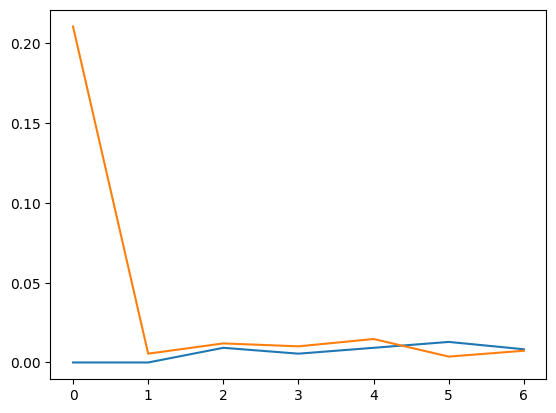

In [133]:
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
dominant_frequencies = np.empty((0,7))

base_dir = '/kaggle/working/synthetic_seismic_mxe'

sampling_rate = 1.0
def dominant_frequency(signal, sampling_rate):
    N = len(signal)
    yf = np.abs(fft(signal)[:N // 2])  # Positive frequency components
    xf = fftfreq(N, 1 / sampling_rate)[:N // 2]
    
    # Avoid signals with zero data or invalid entries
    if len(xf) > 0:
        dominant_freq = xf[np.argmax(yf)]
    else:
        dominant_freq = 0
    return dominant_freq
#dividing each wave into 7 segments and calculating the dominant frequency of each part
for file_name in os.listdir(base_dir):
    file_path = os.path.join(base_dir, file_name)
    if os.path.isfile(file_path):  # Ensure it's a file
        st = read(file_path, debug_headers=True)
        data = st[0].data
        num_segments = 7
        segments = np.array_split(data, num_segments)
        dominant_frequencies_row = [dominant_frequency(segment, sampling_rate) for segment in segments]
        dominant_frequencies = np.append(dominant_frequencies,[dominant_frequencies_row],axis=0)

print(dominant_frequencies.shape)
plt.plot(dominant_frequencies[0])
plt.plot(dominant_frequencies[1])

In [134]:
arrays=np.array(arrays)
mean_array=np.array(mean_array)
arrays.shape
#arrays still does not have noise

(300, 7607)

In [135]:
fft_magnitudes=[]
for array in arrays:
    fft_magnitudes.append(np.max(np.abs(np.fft.fft(array))))
print(len(fft_magnitudes))

300


In [136]:
#just checking the array in general for confirmation
for i, array in enumerate(arrays[:10]):
    print(f"Array {i}: {array}")


Array 0: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.2106934e-06
 -3.1217801e-06 -2.4670703e-06]
Array 1: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.4172019e-05
 -2.2286342e-05 -2.0199155e-05]
Array 2: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.2906777e-06
  6.3231164e-07 -4.2134328e-08]
Array 3: [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.4732436e-05 1.5931491e-05
 1.7200480e-05]
Array 4: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5632079e-06
 -1.3060853e-06 -9.1811864e-07]
Array 5: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -4.2310976e-06
 -4.9580899e-06 -6.5167324e-06]
Array 6: [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.1389888e-07
  1.4042197e-07 -1.9836982e-07]
Array 7: [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.8601477e-06 8.5346574e-06
 7.3610913e-06]
Array 8: [0.000000e+00 0.000000e+00 0.000000e+00 ... 4.174218e-06 4.339065e-06
 4.467529e-06]
Array 9: [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.7564348e-06 

In [137]:
#addition of random noise to fft_magnitudes
np.random.seed(41)
for i in range(5):
    fft_magnitudes.append(np.random.uniform(0,0.1))
fft_magnitudes=np.array(fft_magnitudes)
fft_magnitudes.shape

(305,)

In [138]:
fft_magnitudes
print(np.min(fft_magnitudes))
print(np.max(fft_magnitudes))

0.004346948564475206
0.3570863902568817


In [139]:
print(len(mean_array))
print(mean_array)
print(len(fft_magnitudes))
print(fft_magnitudes)

305
[ 9.14999646e-07 -6.62196783e-07  5.74067883e-07  1.57229024e-07
  4.75330182e-07  4.10441345e-07 -1.00835939e-06  2.03671443e-05
  9.27344104e-07  1.83936876e-07 -2.11194106e-07  6.78548631e-08
 -2.88070311e-07  7.40737789e-07 -9.36308542e-09  2.05092488e-06
  4.48362641e-07  1.55714656e-06  1.13075964e-06 -1.37542585e-07
  8.06813318e-07  3.49958697e-07  5.20571746e-07 -2.94239328e-07
  9.33537706e-07  4.20785028e-07 -2.87290675e-07 -1.17988657e-06
 -1.66716305e-07 -7.41857320e-07  1.71936938e-06 -1.80325088e-07
  7.97195844e-06 -6.04215586e-07 -1.81914561e-06  4.15756205e-07
  1.80736322e-06 -5.11914919e-08  3.34712672e-06 -7.99595890e-10
 -7.13685813e-06  7.87287036e-07 -1.92899009e-07  6.84299380e-07
  8.03244347e-07  8.27007227e-08  2.06692803e-07 -5.99804196e-07
 -6.76033608e-07 -4.86839326e-07 -1.21858349e-07 -4.03241174e-08
 -9.20435980e-07  2.23895185e-07 -9.62213903e-07 -2.66589325e-07
 -9.23396470e-08 -1.81101683e-07 -4.69418155e-05  4.82579594e-07
  9.07245806e-07  1.8

In [140]:
#addition of random noise in the form of arrays to dominant_frequencies
new_rows = np.random.random((5, 7))

# Append the new rows to the existing array
dominant_frequencies_anomaly = np.vstack((dominant_frequencies, new_rows))
print(dominant_frequencies_anomaly.shape)

(305, 7)


In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.fft import fft

In [142]:
# Extract each column into individual arrays
individual_arrays = [dominant_frequencies_anomaly[:, i] for i in range(7)]
print(dominant_frequencies_anomaly)
print(individual_arrays[1]) #checking whether correct or not

[[0.         0.         0.00919963 ... 0.00919963 0.01289134 0.00828729]
 [0.21067157 0.00551978 0.01195952 ... 0.01471941 0.00368324 0.00736648]
 [0.         0.00551978 0.0101196  ... 0.00643974 0.00644567 0.        ]
 ...
 [0.3982128  0.60822646 0.72845649 ... 0.39390821 0.23222257 0.4416646 ]
 [0.37302139 0.58360604 0.10003138 ... 0.08319793 0.12622394 0.32289153]
 [0.64292729 0.99947173 0.28100165 ... 0.87260106 0.78933922 0.21808769]]
[0.00000000e+00 5.51977921e-03 5.51977921e-03 3.03587856e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.43974241e-03 2.94388224e-02 0.00000000e+00 3.67985281e-03
 5.51977921e-03 6.43974241e-03 7.35970561e-03 2.57589696e-02
 0.00000000e+00 2.39190432e-02 5.51977921e-03 5.51977921e-03
 5.51977921e-03 2.20791168e-02 1.10395584e-02 9.19963201e-04
 5.51977921e-03 3.21987121e-02 0.00000000e+00 0.00000000e+00
 7.35970561e-03 1.01195952e-02 3.86384545e-02 9.19963201e-04
 0.00000000e+00 5.51977921e-03 9.19963201e-03 0.00000000e+00
 3.8638

In [143]:
# Combine features into a single array
features = np.column_stack((mean_array, fft_magnitudes, individual_arrays[0], individual_arrays[1], individual_arrays[2], individual_arrays[3], individual_arrays[4], individual_arrays[5], individual_arrays[6]))

# Normalize the features for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
print(features_scaled.shape)
print(features)

(305, 9)
[[ 9.14999646e-07  2.97146179e-02  0.00000000e+00 ...  9.19963201e-03
   1.28913444e-02  8.28729282e-03]
 [-6.62196783e-07  2.49758568e-02  2.10671573e-01 ...  1.47194112e-02
   3.68324125e-03  7.36648250e-03]
 [ 5.74067883e-07  2.84375977e-02  0.00000000e+00 ...  6.43974241e-03
   6.44567219e-03  0.00000000e+00]
 ...
 [ 7.31209265e-06  6.76816241e-02  3.98212796e-01 ...  3.93908213e-01
   2.32222574e-01  4.41664604e-01]
 [-2.27616889e-05  4.34694856e-03  3.73021395e-01 ...  8.31979314e-02
   1.26223945e-01  3.22891530e-01]
 [-1.29789648e-05  1.16423703e-02  6.42927292e-01 ...  8.72601060e-01
   7.89339219e-01  2.18087694e-01]]


In [144]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(features_scaled)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [145]:
print(wcss)
#correctness of code is shown by the decreasing nature of the array wcss

[2745.0, 1213.0076672349196, 876.6239293046845, 688.4808064688999, 500.7181125336348, 391.19464734659573, 252.78504308259988, 193.76200745515368, 137.41951960048874, 108.65277891876895]


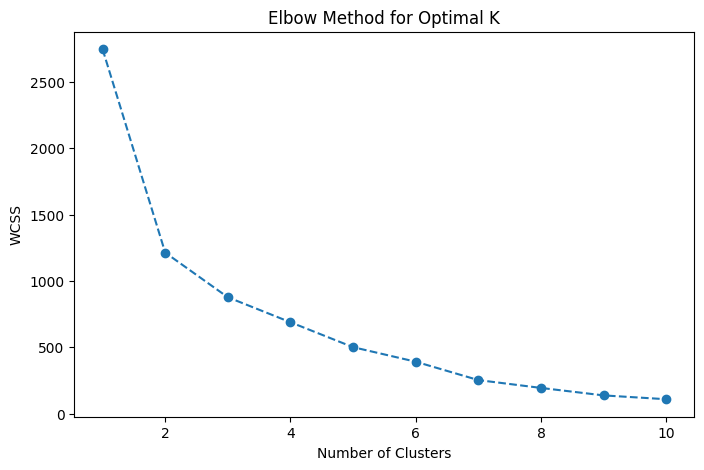

In [146]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [147]:
!pip install kneed

In [148]:
#finding the elbow of the curve using kneelocator
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1]


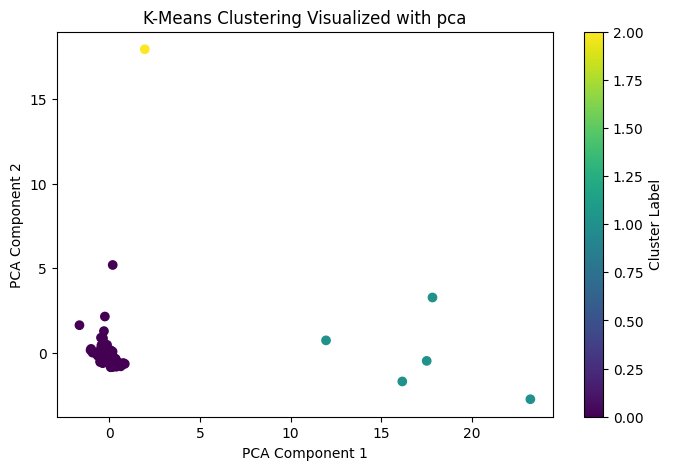

In [151]:
#K MEANS

# Apply K-Means clustering
kmeans = KMeans(n_clusters=kl.elbow, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
print(clusters)

from sklearn.decomposition import PCA
# Apply pca for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot the clustering result in 2D space
plt.figure(figsize=(8, 5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('K-Means Clustering Visualized with pca')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

cluster_id: 0


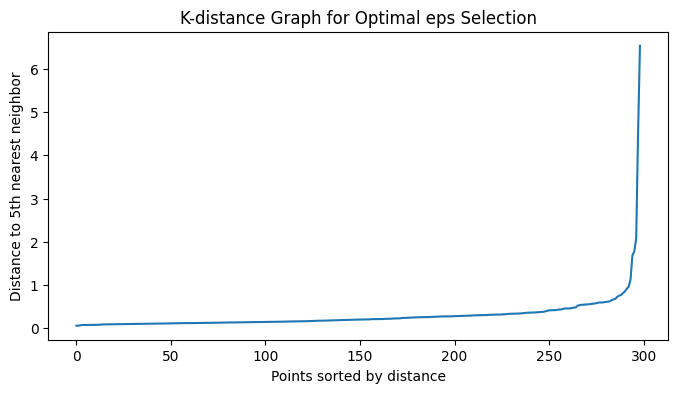

Cluster 0: eps=1.125, best_min_samples=3
2 anomalies detected in Cluster 0.
cluster_id: 1


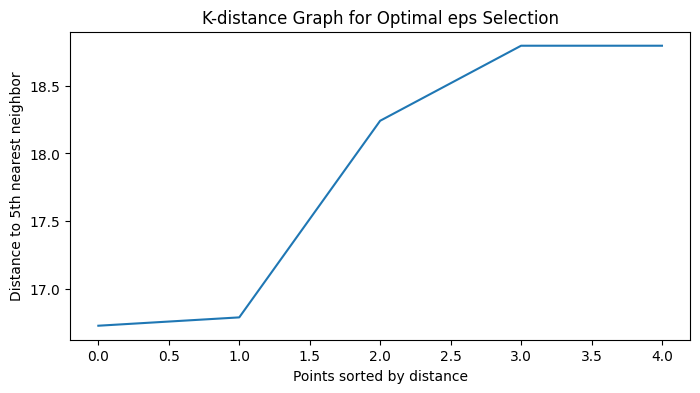

Cluster 1: eps=15.000, best_min_samples=3
1 anomalies detected in Cluster 1.
cluster_id: 2
Skipping small cluster 2


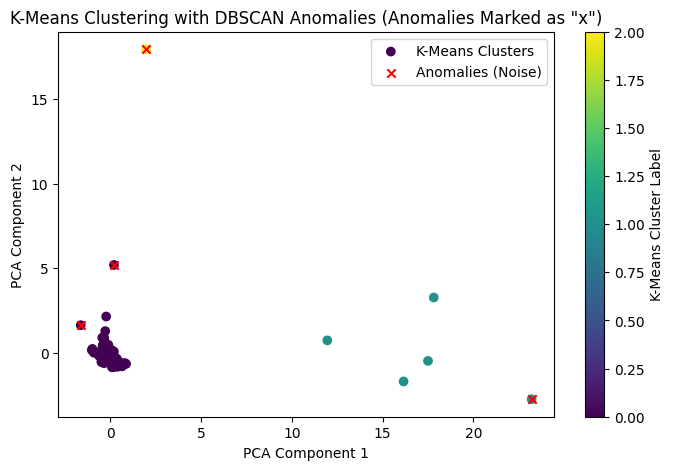

In [153]:
#K MEANS WITH DBSCAN

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Initialize DBSCAN labels for all points
dbscan_labels = np.full(features_scaled.shape[0], -1)

# Allowed list of min_samples values
min_samples_options = [3, 4, 5, 6]

# Function to find optimal eps using k-distance graph
def find_optimal_eps(points, k=5, max_eps=15):
    neighbors = NearestNeighbors(n_neighbors=k).fit(points)
    distances, _ = neighbors.kneighbors(points)
    distances = np.sort(distances[:, k - 1])  # Sort by k-th neighbor distance

    # Plot the k-distance graph
    plt.figure(figsize=(8, 4))
    plt.plot(distances)
    plt.title("K-distance Graph for Optimal eps Selection")
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"Distance to {k}th nearest neighbor")
    plt.show()

    # Use the 90th percentile distance as a heuristic
    candidate_eps = distances[int(0.98 * len(distances))]
    return np.clip(candidate_eps, 0.05, max_eps)  # Clip eps to a valid range

# Apply DBSCAN to each K-Means cluster individually
for cluster_id in np.unique(clusters):
    cluster_points = features_scaled[clusters == cluster_id]
    print("cluster_id:", cluster_id)
    if(cluster_id==0):
        data_new = cluster_points
    point_indices = np.where(clusters == cluster_id)[0]

    if len(cluster_points) < 5:
        print(f"Skipping small cluster {cluster_id}")
        continue

    eps = find_optimal_eps(cluster_points)

    # Select the best min_samples by evaluating silhouette scores
    best_silhouette = 0.5
    best_min_samples = 3
    for min_samples in min_samples_options:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        local_labels = dbscan.fit_predict(cluster_points)

        valid_indices = local_labels != -1
        if np.any(valid_indices) and len(set(local_labels[valid_indices])) > 1:
            silhouette_avg = silhouette_score(cluster_points[valid_indices], local_labels[valid_indices])
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_min_samples = min_samples

    # Apply DBSCAN using the best min_samples
    dbscan = DBSCAN(eps=eps, min_samples=best_min_samples)
    local_labels = dbscan.fit_predict(cluster_points)
    print(f"Cluster {cluster_id}: eps={eps:.3f}, best_min_samples={best_min_samples}")

    # Assign DBSCAN labels back to the global label array
    for idx, label in zip(point_indices, local_labels):
        dbscan_labels[idx] = label if label != -1 else -1

    # Check if the cluster has anomalies or not
    anomalies_present = np.sum(local_labels == -1)
    if anomalies_present == 0:
        print(f"No anomalies detected in Cluster {cluster_id}.")
    else:
        print(f"{anomalies_present} anomalies detected in Cluster {cluster_id}.")
    
# Filter out noise points (-1) for silhouette scoring
valid_indices = dbscan_labels != -1
valid_points = features_scaled[valid_indices]
valid_labels = dbscan_labels[valid_indices]


# Apply PCA for 2D visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Separate normal points and anomalies
normal_points = features_pca[dbscan_labels != -1]
normal_labels = dbscan_labels[dbscan_labels != -1]
anomalies = features_pca[dbscan_labels == -1]

# Plot DBSCAN results
plt.figure(figsize=(8,5))

# Plot K-Means clusters with distinct colors
scatter_normal = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=clusters, cmap='viridis', marker='o', label='K-Means Clusters')

# Plot anomalies (noise points) as 'x'
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', marker='x', label='Anomalies (Noise)')

plt.title('K-Means Clustering with DBSCAN Anomalies (Anomalies Marked as "x")')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter_normal, label='K-Means Cluster Label')
plt.legend()
plt.show()


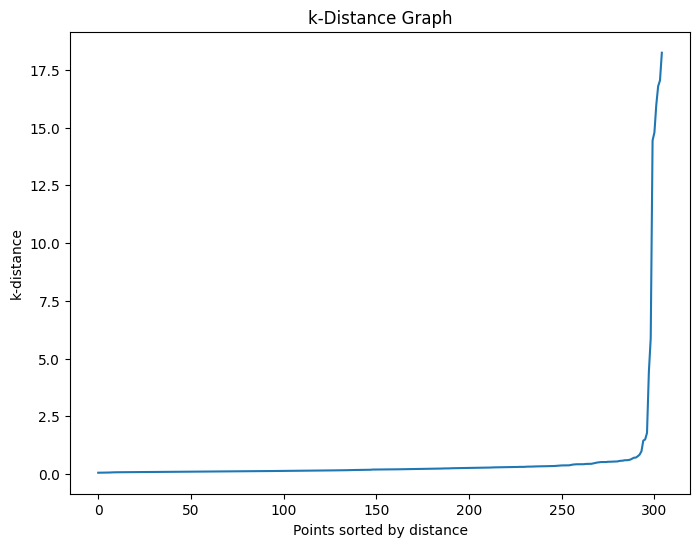

Evaluating eps=0.3, min_samples=3 => Silhouette Score: 0.062
Evaluating eps=0.3, min_samples=4 => Silhouette Score: 0.036
Evaluating eps=0.3, min_samples=5 => Silhouette Score: 0.107
Evaluating eps=0.3, min_samples=6 => Silhouette Score: 0.420
Evaluating eps=0.37777777777777777, min_samples=3 => Silhouette Score: 0.481
Evaluating eps=0.37777777777777777, min_samples=4 => Silhouette Score: 0.519
Evaluating eps=0.37777777777777777, min_samples=5 => Silhouette Score: 0.520
Evaluating eps=0.37777777777777777, min_samples=6 => Silhouette Score: 0.515
Evaluating eps=0.45555555555555555, min_samples=3 => Silhouette Score: 0.576
Evaluating eps=0.45555555555555555, min_samples=4 => Silhouette Score: 0.573
Evaluating eps=0.45555555555555555, min_samples=5 => Silhouette Score: 0.584
Evaluating eps=0.45555555555555555, min_samples=6 => Silhouette Score: 0.536
Evaluating eps=0.5333333333333333, min_samples=3 => Silhouette Score: 0.796
Evaluating eps=0.5333333333333333, min_samples=4 => Silhouette S

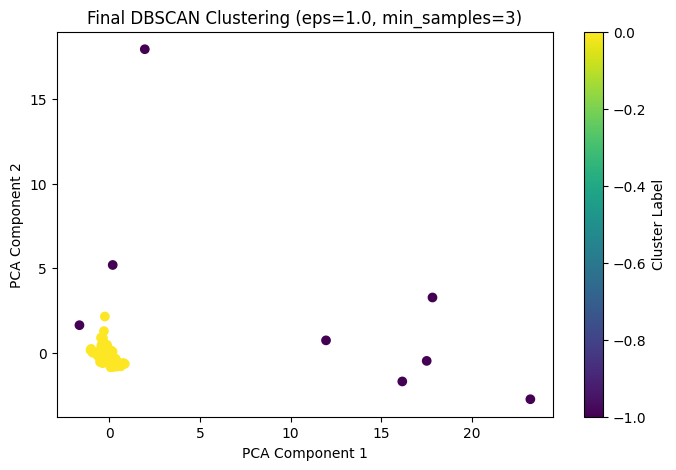

In [154]:
#DBSCAN directly
# Find the best eps for DBSCAN using k-distance graph
def plot_k_distance_graph(features_scaled):
    # Use nearest neighbors to find k-distance
    neighbors = NearestNeighbors(n_neighbors=4)  # You can adjust n_neighbors (min_samples)
    neighbors.fit(features_scaled)
    distances, indices = neighbors.kneighbors(features_scaled)
    distances = np.sort(distances[:, -1], axis=0)  # Sort distances to the 4th nearest neighbor
    plt.figure(figsize=(8, 6))
    plt.plot(distances)
    plt.title('k-Distance Graph')
    plt.xlabel('Points sorted by distance')
    plt.ylabel('k-distance')
    plt.show()

# Plot k-distance graph to visually select eps
plot_k_distance_graph(features_scaled)

# Evaluate DBSCAN with different eps and min_samples values
def evaluate_dbscan(features_scaled, eps_values, min_samples_values):
    best_silhouette = -1
    best_eps = None
    best_min_samples = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Apply DBSCAN with specific eps and min_samples
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(features_scaled)
            
            # Compute Silhouette Score (skip if all points are noise)
            if len(set(labels)) > 1:  # At least two clusters
                silhouette_avg = silhouette_score(features_scaled, labels)
                if silhouette_avg > best_silhouette:
                    best_silhouette = silhouette_avg
                    best_eps = eps
                    best_min_samples = min_samples
                print(f"Evaluating eps={eps}, min_samples={min_samples} => Silhouette Score: {silhouette_avg:.3f}")
            else:
                print(f"Evaluating eps={eps}, min_samples={min_samples} => No valid clusters (Silhouette Score not computed)")

    print(f"\nBest eps: {best_eps}, Best min_samples: {best_min_samples} => Best Silhouette Score: {best_silhouette:.3f}")
    return best_eps, best_min_samples

# Define ranges for eps and min_samples to test
eps_values = np.linspace(0.3, 1.0, 10)  # Example range for eps
min_samples_values = [3, 4, 5, 6]      # Example values for min_samples

# Evaluate and choose the best eps and min_samples based on silhouette score
best_eps, best_min_samples = evaluate_dbscan(features_scaled, eps_values, min_samples_values)

# Final DBSCAN with the best parameters
dbscan_final = DBSCAN(eps=best_eps, min_samples=best_min_samples)
final_labels = dbscan_final.fit_predict(features_scaled)

# Visualize the final DBSCAN clustering results
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(8,5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=final_labels, cmap='viridis', marker='o', label='Data Points')
plt.title(f'Final DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Total anomalies from K-Means + DBSCAN: 4
Total anomalies from direct DBSCAN: 8
Number of common anomalies: 4
Indices of common anomalies: {304, 58, 7, 79}


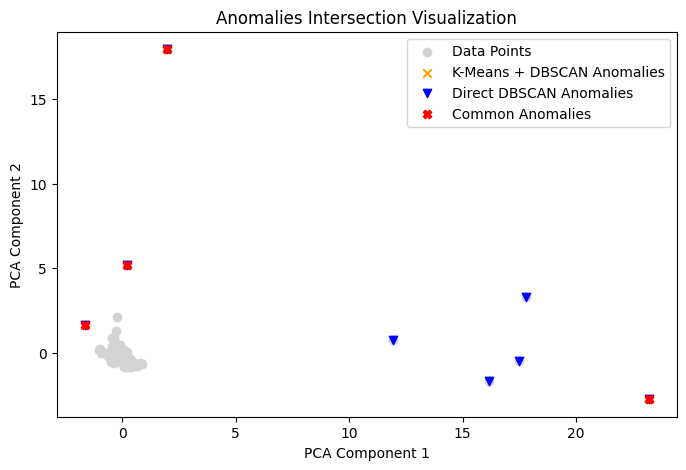

In [155]:
# DBSCAN directly on the full dataset
dbscan_direct = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_direct_labels = dbscan_direct.fit_predict(features_scaled)

# Anomalies from both approaches
kmeans_dbscan_anomalies = set(np.where(dbscan_labels == -1)[0])
direct_dbscan_anomalies = set(np.where(dbscan_direct_labels == -1)[0])

# Intersection of anomalies
common_anomalies = kmeans_dbscan_anomalies.intersection(direct_dbscan_anomalies)

print(f"Total anomalies from K-Means + DBSCAN: {len(kmeans_dbscan_anomalies)}")
print(f"Total anomalies from direct DBSCAN: {len(direct_dbscan_anomalies)}")
print(f"Number of common anomalies: {len(common_anomalies)}")
print("Indices of common anomalies:", common_anomalies)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c='lightgray', marker='o', label='Data Points')

# Plot anomalies from both approaches
kmeans_dbscan_anomalies_points = features_pca[list(kmeans_dbscan_anomalies)]
direct_dbscan_anomalies_points = features_pca[list(direct_dbscan_anomalies)]

plt.scatter(kmeans_dbscan_anomalies_points[:, 0], kmeans_dbscan_anomalies_points[:, 1],
            color='orange', marker='x', label='K-Means + DBSCAN Anomalies')
plt.scatter(direct_dbscan_anomalies_points[:, 0], direct_dbscan_anomalies_points[:, 1],
            color='blue', marker='v', label='Direct DBSCAN Anomalies')

# Highlight common anomalies
if common_anomalies:
    common_anomalies_points = features_pca[list(common_anomalies)]
    plt.scatter(common_anomalies_points[:, 0], common_anomalies_points[:, 1],
                color='red', marker='X', label='Common Anomalies')

plt.title('Anomalies Intersection Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
